## Guided Project: Find out the two best markets to advertise e-learning courses

[freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on programming. Most of the courses are on on web, mobile development and domains.

The survey data is available in [github repository](https://github.com/freeCodeCamp/2017-new-coder-survey)
The goal of the project is to find out the two best markets to invest on product advertisement by analysing survey data.

### Understanding the data

In [1]:
# read the data set and explor
import pandas as pd
direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
survey = pd.read_csv(direct_link, low_memory = 0)

In [2]:
survey.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#The dataframe rows and columns
survey.shape

(18175, 136)

In [4]:
#Find the null values in the dataframe
survey.isnull().sum()

Age                        2808
AttendedBootcamp            466
BootcampFinish            17106
BootcampLoanYesNo         17096
BootcampName              17226
BootcampRecommend         17102
ChildrenNumber            15861
CityPopulation             2821
CodeEventConferences      16566
CodeEventDjangoGirls      18010
CodeEventFCC              16467
CodeEventGameJam          17885
CodeEventGirlDev          17878
CodeEventHackathons       16198
CodeEventMeetup           15703
CodeEventNodeSchool       17729
CodeEventNone             17099
CodeEventOther            17605
CodeEventRailsBridge      18042
CodeEventRailsGirls       18043
CodeEventStartUpWknd      17631
CodeEventWkdBootcamps     17628
CodeEventWomenCode        17694
CodeEventWorkshops        16422
CommuteTime                8929
CountryCitizen             2793
CountryLive                2839
EmploymentField           10059
EmploymentFieldOther      17097
EmploymentStatus           3830
                          ...  
Resource

### Checking for Sample Representativity

Our aim is to explore the following questions in the data set
1. The best location to advertise
2. How much money people are willing to spent on learning

The colum "JobRoleInterest" is the job role that each person is interested in. For some of the rows the entries can be more than one. will explore the column further.

In [5]:
survey["JobRoleInterest"].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

From the frequency percentage as shown above it is clear that some people are interested more than one subject.

In [6]:
#find the null values for JonRoleInterest column
survey["JobRoleInterest"].isnull().sum()

11183

In [7]:
survey_job = survey.copy()

In [8]:
survey_job["JobRoleInterest"].dropna(inplace = True)

In [9]:
split_data = survey_job["JobRoleInterest"].str.split(',')

#frequency table describing JobRoleInterest options
num_options = split_data.apply(lambda x: len(x))
num_options.value_counts(normalize = True).sort_index()*100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

From the above results we can see that 31.65% have given one area that their interested on meaning that they have a clear idea in area of interest. Others seems to have mixed areas of interests.

Now we will analyse the how many respondents choose one of the areas 'Web' and 'mobile development'.

In [10]:
interests = survey_job["JobRoleInterest"]
web_or_mobile = interests.str.contains('Web Developer|Mobile Developer')
freq_table = web_or_mobile.value_counts(normalize=True)*100
freq_table

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

([<matplotlib.axis.XTick at 0x7f6018bd5c50>,
 <a list of 2 Text xticklabel objects>)

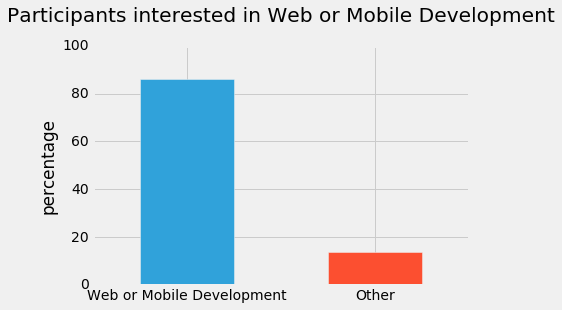

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
freq_table.plot.bar()
plt.ylim(0,100)
plt.title("Participants interested in Web or Mobile Development",y = 1.08)
plt.ylabel("percentage")
plt.xticks([0,1],["Web or Mobile Development", "Other"], rotation = 0)

From the above analysis we can see that 86% of the respondants are interested in Web or mobile development.  

### Best location to advertise

In [12]:
#Check for the null values in CountryLive
survey["CountryLive"].isnull().sum()

2839

In [13]:
#assign the non-null values from JobRoleInterest
survey_new = survey[survey["JobRoleInterest"].notnull()].copy()

In [14]:
survey_new["CountryLive"].dropna(inplace = True)

In [15]:
country_absolute_freq = survey_new["CountryLive"].value_counts()
country_relative_freq = survey_new["CountryLive"].value_counts(normalize = True)*100
country_relative_freq.sort_values(ascending = False).head(5)

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Name: CountryLive, dtype: float64

In [16]:
pd.DataFrame(data = {'Absolute_freq':country_absolute_freq, 
                     'Percentage':country_relative_freq})

,Absolute_freq,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


From the above results the two countries to do the marketing is United States of America with 45.7% and India 7.72%.

### Spending Money for learning

We will further analyse how much money the new coders are willing to spent for learning. There are two columns 'MoneyForLearning' that gives us how much spent on a course and 'MonthsProgramming' column which indicates the months of the course taken. From these colums we can calculate how much spent on a course monthly.

We wil also narrow our analysis to the top 4 highest frequency countries. They are United States of America, India, United kindom, Canada. Another reason to choose the 4 countries is the courses are in English and in these selected countries most people know English and it will be easier to advertise in.

In [17]:
#replace o values with 1
survey_new["MonthsProgramming"].replace(0,1,inplace = True)

In [18]:
#calculate monthly spent course fees and assign to new column Monthlyfees
survey_new["MonthlyFees"] = survey_new["MoneyForLearning"]/survey_new['MonthsProgramming']

In [19]:
survey_new["MonthlyFees"].isnull().sum()

675

In [20]:
survey_new = survey_new[survey_new["MonthlyFees"].notnull()]

In [21]:
survey_new["CountryLive"].isnull().sum()

105

In [22]:
survey_new = survey_new[survey_new['CountryLive'].notnull()]

In [23]:
survey_new['CountryLive'].value_counts().head(5)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [24]:
countries_mean = survey_new.groupby('CountryLive').mean()
countries_mean

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampRecommend,ChildrenNumber,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlyFees
CountryLive,,,,,,,,,,,,,,,,,,,,,
Afghanistan,18.750000,0.000000,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.000000
Albania,20.666667,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,7.111111
Algeria,23.750000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,0.000000
Angola,20.000000,0.000000,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,116.666667
Anguilla,25.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
Argentina,26.466667,0.000000,NaN,NaN,NaN,1.166667,1.0,NaN,1.0,1.0,...,1.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,55.984444
Australia,28.465347,0.068627,0.142857,0.428571,0.857143,1.714286,1.0,NaN,1.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,419.268452
Austria,26.500000,0.062500,0.000000,0.000000,1.000000,2.000000,1.0,NaN,1.0,NaN,...,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,936.208333
Azerbaijan,27.666667,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,25.555556


In [25]:
countries_mean['MonthlyFees'][['United States of America','India','United Kingdom','Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MonthlyFees, dtype: float64

From the above results we can see that United Kingdom and Canada spent less monthly money on courses comparing to the top 2 countries. India suprisingly spends high amount of monthly fees. We will further analyse to see whether there is any outliers in these findings.

In [26]:
#get only the 4 countries data
top_countries = survey_new[survey_new['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


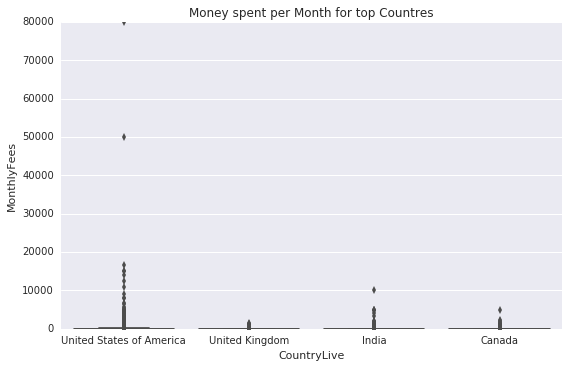

In [27]:
import seaborn as sns

sns.boxplot(y = 'MonthlyFees', x ='CountryLive', data = top_countries)
plt.title('Money spent per Month for top Countres')
plt.show()

From the above box plot for countries United Kingdom, India and Canada there arn't outstanding outliers but for America there is 2 outstanding outliers with one at 50,000 and other one at 80,000 monthly spent money.

We will remove the outliers and do the analysis again. We will remove any value that exceed 20,000 dollars per month.

### Analysing after removing the outliers

In [28]:
#select the cuntries that Monthlyfees less than 20000
survey_clean = top_countries[top_countries["MonthlyFees"]<20000]

In [29]:
#calculate the mean value
survey_mean = survey_clean.groupby('CountryLive').mean()
survey_mean["MonthlyFees"][['United States of America','India','United Kingdom','Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MonthlyFees, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


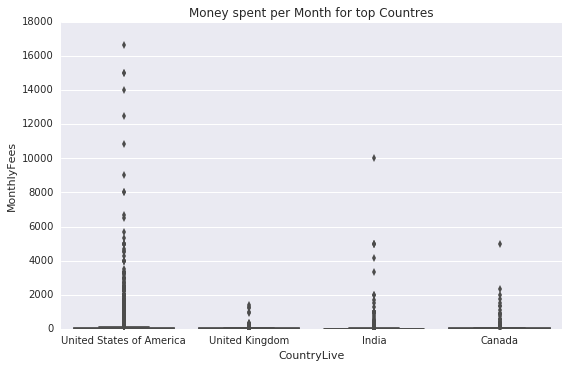

In [30]:
sns.boxplot(x = 'CountryLive', y = 'MonthlyFees', data = survey_clean)
plt.title('Money spent per Month for top Countres')
plt.show()

From the above boxplot we can see there is now outliers from India and Canada as well. There is 4 outliers from India above 2500 dollars Monthly spent and from America outliers above 6000 monthly spent.

We will analyse the outliers from India whether these students attended a bootcamp.

In [31]:
#find the monthlyfees greater than 2500 from India
outliers_india = survey_clean[(survey_clean["MonthlyFees"]>=2500) & (survey_clean['CountryLive']=='India')]
outliers_india

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlyFees
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


From analysing the above table the students have not taken any bootcamp courses and its difficult to conclude the reason for the outliers.

We will remove the outliers for India from the data set.

In [32]:
#drop the outliers from dataset
survey_clean = survey_clean.drop(outliers_india.index)

We will analyse the outliers for America

In [33]:
outliers_america = survey_clean[(survey_clean['CountryLive']=='United States of America')&
                                (survey_clean['MonthlyFees']>=6000)]
outliers_america

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlyFees
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


In [34]:
outliers_america[['AttendedBootcamp','MonthsProgramming']]

,AttendedBootcamp,MonthsProgramming
718,1.0,1.0
1222,1.0,2.0
3184,1.0,1.0
3930,0.0,6.0
6805,1.0,1.0
7198,0.0,5.0
7505,1.0,3.0
9778,1.0,1.0
16650,0.0,12.0
16997,0.0,1.0


From the above analysis we can see that some have attended a boot camp which can be a reason for high monthlyfees value. For those who didnt attend any bootcamp we can see some of them have been coding for some months which can be the reason for the high monthly fees.

For the next analysis we will remove the below outliers and do the analysis,
  * Coders who haven't attended any bootcamp
  * Coders MothsProgramming less than 3 months

In [35]:
outliers_america = outliers_america[(outliers_america['AttendedBootcamp'] == 0) |
                                    (outliers_america['MonthsProgramming'] <=3)]

In [36]:
survey_clean = survey_clean.drop(outliers_america.index)

From Canada also there is one ouliter monthly fees greater than 5000 dollars, we will analyse this further.

In [37]:
outlier_canada = survey_clean[(survey_clean["CountryLive"]== 'Canada') &
                             (survey_clean['MonthlyFees'] >=5000)]
outlier_canada

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MonthlyFees
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


In [38]:
outlier_canada[["MonthsProgramming","MonthlyFees"]]

,MonthsProgramming,MonthlyFees
13659,2.0,5000.0


From above results we can see that the coder have attended a bootcamp but since the Months programming is less than 3 months we will remove this outlier from the data set as well.

In [39]:
survey_clean = survey_clean.drop(outlier_canada.index)

We will analyse the data again after removing all the outliers

In [40]:
survey_clean.groupby('CountryLive').mean()['MonthlyFees'].sort_values(ascending = False)

CountryLive
United States of America    142.654608
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
Name: MonthlyFees, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


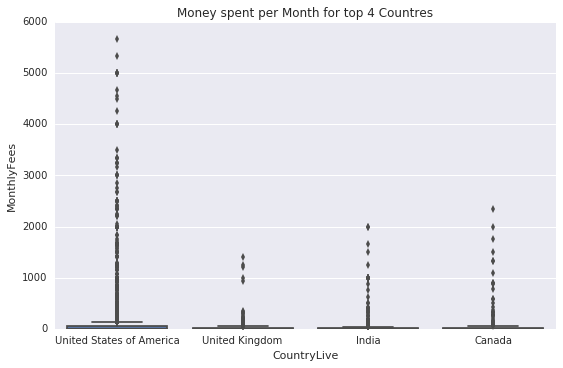

In [41]:
sns.boxplot(x='CountryLive', y= 'MonthlyFees', data =survey_clean)
plt.title('Money spent per Month for top 4 Countres')
plt.show()

From the above results we can see that US is the country paying highest for monthly fees of 143.00 dollars and Canada as second highest paying average monthly fees of 93.00 dollars. One country that we could definitly choose is United States of America, since high number of coders to enroll and highest average monthly fees are from US.

For the second country we will explore the 'CoountryLive' column again.

In [42]:
survey_clean['CountryLive'].value_counts(normalize = True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

The price of a subscription is 59 dollars per month for the courses. Eventhough Canada has the second highest monthly fees, India has 11.73% the second highest number of coders taking the courses and Canada at 6.13%. $59 is a amount that India can afford and considering the large population, I think advertising in India would be a good idea. 

Therefore the advertising budget can be split such as 60% in the US, 30% in India and 20% in Canada or since the Canada has the 4th highest amount of coders, the advertising can be only done in US and India. The market team can further decide on these options.

### Conclusion

The goal of the project was to analyse the survey data and determin the best 2 markets to advertise in. United States of America is the best country to advertise in with results from the analysis.

As the second country India can be selected or the advertising budget can be split such that 60% in the US, 30% in India and 20% in Canada. With these 2 options marketing team can further decide on the second country to advertise in.